### Movielens Case Study
Project 1 
DESCRIPTION
Background of Problem Statement :
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.


# Problem Objective :
### Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.


Analysis Tasks to be performed:

•	Import the three datasets

•	Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    
    1.	User Age Distribution
    2.	User rating of the movie “Toy Story”
    3.	Top 25 movies by viewership rating
    4.	Find the ratings for all the movies reviewed by for a particular user of user id = 2696
•	Feature Engineering:
   
       Use column genres:
    1.	Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    2.	Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    3.	Determine the features affecting the ratings of any particular movie.
    4.	Develop an appropriate model to predict the movie ratings


### ------------------------------------------------------------------------------------------------------------------------------------------- 

### import the three dataset  

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Users data import
print("--------------- USER Data -----------------------")
users = pd.read_csv("users.dat",delimiter="::",header = None)
users.columns = ['User_id','Gender','Age','Occupation','Zip_code']
print(users.head(),"\n")
# Ratings data import
ratings = pd.read_csv("ratings.dat",sep="::", names = ['User_id','Movie_id','Rating','Timestaemp'] )
print("--------------- Rating Data -----------------------")
print(ratings.head(),"\n")
# Movies data import 
Movies = pd.read_csv("movies.dat",sep="::",names=['Movie_id','Title','Genres'])
print("--------------- Movie Data -----------------------")
print(Movies.head())

--------------- USER Data -----------------------
   User_id Gender  Age  Occupation Zip_code
0        1      F    1          10    48067
1        2      M   56          16    70072
2        3      M   25          15    55117
3        4      M   45           7    02460
4        5      M   25          20    55455 

--------------- Rating Data -----------------------
   User_id  Movie_id  Rating  Timestaemp
0        1      1193       5   978300760
1        1       661       3   978302109
2        1       914       3   978301968
3        1      3408       4   978300275
4        1      2355       5   978824291 

--------------- Movie Data -----------------------
   Movie_id                               Title                        Genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4          

In [3]:
print(users.shape)
print(ratings.shape)
print(Movies.shape)

(6040, 5)
(1000209, 4)
(3883, 3)


Create a new dataset [Master_Data] with the following 

columns MovieID, Title, UserID, Age, Gender, Occupation Rating.

(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [4]:
data_1 = pd.merge(left = Movies , right = ratings ,how='inner', on='Movie_id' )

In [5]:
data_1

,Movie_id,Title,Genres,User_id,Rating,Timestaemp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [6]:
Master_data= data_1.merge(users, on = 'User_id', how = 'inner')
Master_data

,Movie_id,Title,Genres,User_id,Rating,Timestaemp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [7]:
Master_data.columns=['MovieID','Title','Genres','UserID','Rating','Timestaemp','Gender','Age','Occupation','Zip_code']

In [8]:
Master_data

,MovieID,Title,Genres,UserID,Rating,Timestaemp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [9]:
#Master_data.rename(columns={'MOVIE_ID':'MovieID',  'USER_ID':'UserID','AGE':'Age','GENDER': 'Gender', 'Occupation':'Occupation' ,'Rating':'Rating'},inplace = True)

In [10]:
Master_data.isna().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestaemp    0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [11]:
#Master_data.drop(['Zip_code','Timestaemp','Genres'],axis=1,inplace=True)
#Master_data

In [12]:
Master_Data = Master_data.reindex(columns=['MovieID', 'Title', 'UserID', 'Age','Zip_code','Timestaemp', 'Gender', 'Occupation' ,'Genres','Rating'])
Master_Data

,MovieID,Title,UserID,Age,Zip_code,Timestaemp,Gender,Occupation,Genres,Rating
0,1,Toy Story (1995),1,1,48067,978824268,F,10,Animation|Children's|Comedy,5
1,48,Pocahontas (1995),1,1,48067,978824351,F,10,Animation|Children's|Musical|Romance,5
2,150,Apollo 13 (1995),1,1,48067,978301777,F,10,Drama,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,48067,978300760,F,10,Action|Adventure|Fantasy|Sci-Fi,4
4,527,Schindler's List (1993),1,1,48067,978824195,F,10,Drama|War,5
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,92843,958489970,M,4,Drama|Thriller,4
1000205,3535,American Psycho (2000),5727,25,92843,958489970,M,4,Comedy|Horror|Thriller,2
1000206,3536,Keeping the Faith (2000),5727,25,92843,958489902,M,4,Comedy|Romance,5
1000207,3555,U-571 (2000),5727,25,92843,958490699,M,4,Action|Thriller,3


### -----------------------------------------------------------------------------------------------------------------

### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696 • Feature Engineering:

# 1 User Age Distribution

In [13]:
import matplotlib.pyplot as plt

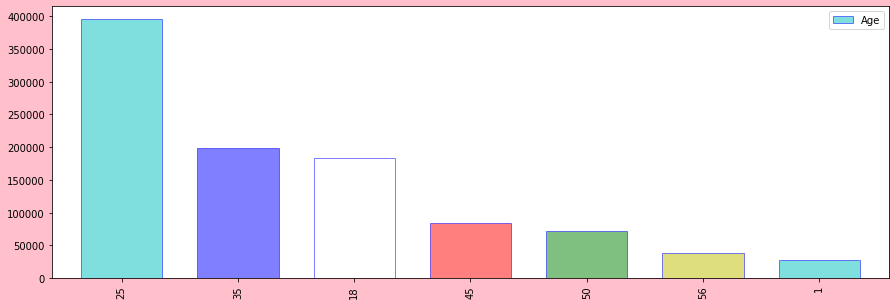

In [14]:
plt.figure(figsize=(15,5),facecolor='pink',edgecolor='B',)
Master_data.Age.value_counts().plot.bar(alpha=0.5,edgecolor='b',width=0.7,color=['c','b','w','r','g','y'])
plt.legend()

# 2. User rating of the movie “Toy Story” 

In [15]:
#User rating of the movie “Toy Story”
Master_data[Master_data.Title.str.contains("Toy Story")]['Title'].unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

In [16]:
Master_data[Master_data.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count()

Rating
1     16
2     61
3    345
4    835
5    820
Name: MovieID, dtype: int64

In [17]:
Master_data[Master_data.Title=='Toy Story (1995)'].Rating.value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

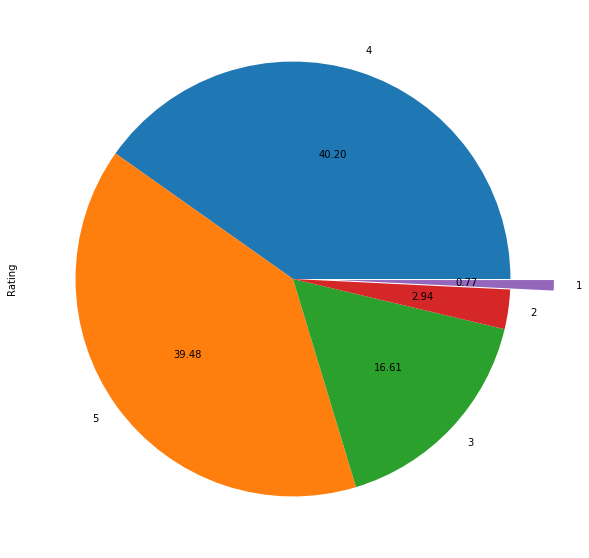

In [18]:
Master_data[Master_data.Title=='Toy Story (1995)'].Rating.value_counts().plot.pie(explode=[0,0,0,0,0.2] ,
                                                                                                         autopct="%0.02f",
                                                                                                         figsize=(10,10))

# 3 Top 25 movies by viewership rating 

In [19]:
Top_rating = Master_data.groupby(['Title']).Rating.count().nlargest(25)
Top_rating

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

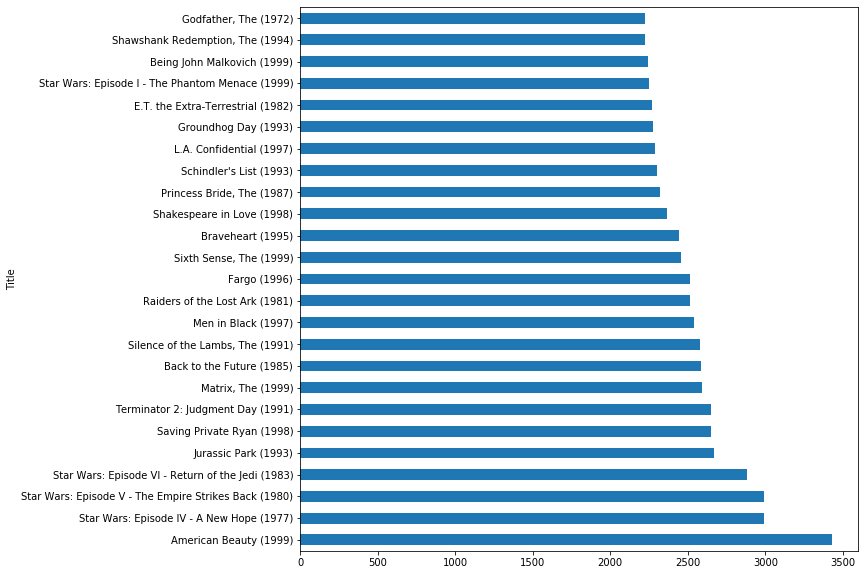

In [20]:
Top_rating.plot.barh(figsize=(10,10))

# 4 Find the ratings for all the movies reviewed by for a particular user of user id = 2696 • Feature Engineering 

In [21]:
user_Rating =Master_data[(Master_data['UserID']==2696)].Rating.value_counts()
user_Rating

4    11
3     3
2     3
1     2
5     1
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Rating')

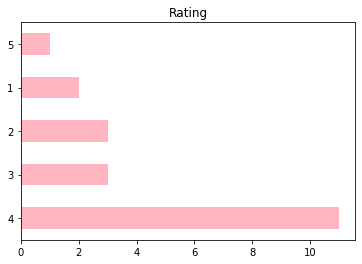

In [22]:
user_Rating.plot.barh(color='lightpink')
plt.title("Rating")

# ---------------------------------------------------------------------------- 

Use column genres:
    
1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

3. Determine the features affecting the ratings of any particular movie.

4. Develop an appropriate model to predict the movie ratings

# 1 Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres) 

In [23]:
lst =Master_data.Genres.str.split("|").tolist()
final=[]
for i in lst:
    for j in i:
        final.append(j)

In [24]:
list(set(final))

['Action',
 'Film-Noir',
 'Drama',
 'Musical',
 'War',
 'Fantasy',
 'Horror',
 'Mystery',
 'Crime',
 'Documentary',
 'Animation',
 'Sci-Fi',
 'Western',
 'Thriller',
 'Romance',
 'Comedy',
 "Children's",
 'Adventure']

# 2 Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [25]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0)
Master_data.Genres.str.get_dummies("|")

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
finalOHEDF = pd.concat([Master_data.Genres.str.get_dummies("|") , Master_data.iloc[:,[0,1,3,7,8,9,5,6,4]]] , axis=1)

In [27]:
finalOHEDF

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Western,MovieID,Title,UserID,Age,Occupation,Zip_code,Timestaemp,Gender,Rating
0,0,0,1,1,1,0,0,0,0,0,...,0,1,Toy Story (1995),1,1,10,48067,978824268,F,5
1,0,0,1,1,0,0,0,0,0,0,...,0,48,Pocahontas (1995),1,1,10,48067,978824351,F,5
2,0,0,0,0,0,0,0,1,0,0,...,0,150,Apollo 13 (1995),1,1,10,48067,978301777,F,5
3,1,1,0,0,0,0,0,0,1,0,...,0,260,Star Wars: Episode IV - A New Hope (1977),1,1,10,48067,978300760,F,4
4,0,0,0,0,0,0,0,1,0,0,...,0,527,Schindler's List (1993),1,1,10,48067,978824195,F,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,...,0,3513,Rules of Engagement (2000),5727,25,4,92843,958489970,M,4
1000205,0,0,0,0,1,0,0,0,0,0,...,0,3535,American Psycho (2000),5727,25,4,92843,958489970,M,2
1000206,0,0,0,0,1,0,0,0,0,0,...,0,3536,Keeping the Faith (2000),5727,25,4,92843,958489902,M,5
1000207,1,0,0,0,0,0,0,0,0,0,...,0,3555,U-571 (2000),5727,25,4,92843,958490699,M,3


# 3 Determine the features affecting the ratings of any particular movie 

In [28]:
Master_Data1=Master_data[Master_data.Title=='American Beauty (1999)']
Master_Data1.head()

,MovieID,Title,Genres,UserID,Rating,Timestaemp,Gender,Age,Occupation,Zip_code
103,2858,American Beauty (1999),Comedy|Drama,6,1,978236809,F,50,9,55117
236,2858,American Beauty (1999),Comedy|Drama,8,5,978229817,M,25,12,11413
342,2858,American Beauty (1999),Comedy|Drama,9,4,978225333,M,25,17,61614
691,2858,American Beauty (1999),Comedy|Drama,10,3,978224627,F,35,1,95370
1022,2858,American Beauty (1999),Comedy|Drama,18,5,978156168,F,18,3,95825


In [29]:
from scipy.stats import chi2_contingency

ctMovieId = pd.crosstab(Master_Data1.MovieID,Master_Data1.Rating)
ctTitle = pd.crosstab(Master_Data1.Title,Master_Data1.Rating)
ctUserID = pd.crosstab(Master_Data1.UserID,Master_Data1.Rating)
ctGender = pd.crosstab(Master_Data1.Gender,Master_Data1.Rating)
ctAge = pd.crosstab(Master_Data1.Age,Master_Data1.Rating)
ctOccupation = pd.crosstab(Master_Data1.Occupation,Master_Data1.Rating)
ctZipCode = pd.crosstab(Master_Data1['Zip_code'],Master_Data1.Rating)

In [30]:
from scipy.stats import chi2_contingency

list1 = [ctTitle,ctTitle,ctUserID,ctGender,ctAge,ctOccupation,ctZipCode]

for i in list1:
    stat,pvalue,dof,expected_R = chi2_contingency(i)
    if pvalue <= 0.05:
        print("Alternate Hypothesis passed. {0:10} and Rating have Relationship  pvalue = {1:2}".format(i.index.name,pvalue))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have  Relationship".format(i.index.name))

Null hypothesis passed. Title and Profit doesnot have  Relationship
Null hypothesis passed. Title and Profit doesnot have  Relationship
Null hypothesis passed. UserID and Profit doesnot have  Relationship
Alternate Hypothesis passed. Gender     and Rating have Relationship  pvalue = 0.006693963902916528
Alternate Hypothesis passed. Age        and Rating have Relationship  pvalue = 1.7165792272634493e-09
Alternate Hypothesis passed. Occupation and Rating have Relationship  pvalue = 0.0015706433878116685
Null hypothesis passed. Zip_code and Profit doesnot have  Relationship


# 4 .Create a model using above features

In [31]:
features = Master_Data1.loc[:,["Gender","Occupation","Age"]].values
label = Master_Data1.loc[:,'Rating'].values

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
features[:,0] = le.fit_transform(features[:,0])

ohe = OneHotEncoder(categorical_features=[0])
features = ohe.fit_transform(features).toarray()

C:\Users\nilesh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, label,
                                                test_size = 0.2,
                                                random_state=1)

In [34]:
features.shape

(3428, 4)

#### xgboost 

In [35]:
from xgboost import XGBRFClassifier
xgb =  XGBRFClassifier(n_estimators=200)
xgb.fit(x_train,y_train)


XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [36]:
xgb.score(x_train,y_train)

0.5725747629467542

In [37]:
xgb.score(x_test,y_test)

0.5728862973760933

#### KNN 

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, label,
                                                test_size = 0.2,
                                                random_state=3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.5681983953318746
0.5685131195335277


#### Random Forest 

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, label,
                                                test_size = 0.2,
                                                random_state=4)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test, y_test))

0.587527352297593
0.575801749271137
